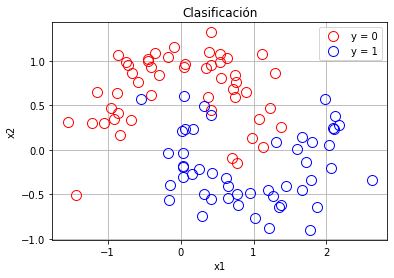

In [728]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  train_test_split
from sklearn import metrics

df = pd.read_csv('df_clasificacion_3.cvs')
#print(df)

#Parte 1
x1 = np.asanyarray(df[['x1']])           
x2 = np.asanyarray(df[['x2']])
y = np.asanyarray(df['y'])

#Parte 2
#x1 = np.array([[1.2], [1.3], [1], [1.5], [1.2], [1.6], [1.4], [0.1], [0.4], [0.95], [0.8], [1.7], [0.48], [2.2], [2.4], [2], [2.3], [1.65], [0.63], [0.9], [0.54], [0.14], [1.5], [0.27]])
#x2 = np.array([[0.08], [-0.3], [-0.08], [-0.2], [-0.1], [0.4], [0.2], [-0.47], [-0.1], [-0.13], [-0.4], [0.08], [-0.42], [0.25], [-0.3], [0.15], [0.5], [0.33], [-0.37], [-0.32], [-0.35], [-0.21], [-0.45], [-0.17]])
#y = np.array([ 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

x = np.concatenate((x1,x2),axis=1) 

#Seleccionamos los datos de entrenamiento y generalizacion
x_train, x_test, y_train, y_test = train_test_split(x,y)

#Graficando
plt.figure()
plt.grid()
plt.title('Clasificación')
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x[y==0,0],x[y==0,1],'ro',fillstyle = 'none', markersize = 10)
plt.plot(x[y==1,0],x[y==1,1],'bo',fillstyle = 'none', markersize = 10)
plt.legend(['y = 0','y = 1'])
plt.show()

In [729]:
def Resultado (model, x_test,y_test):

  y_pred = model.predict(x_test) #Prediccion

  #Graficando
  plt.figure()
  plt.grid()
  plt.title('Clasificación')
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.plot(x_test[y_test==0,0],x_test[y_test==0,1],'ro',fillstyle = 'none', markersize = 10)
  plt.plot(x_test[y_test==1,0],x_test[y_test==1,1],'bo',fillstyle = 'none', markersize = 10)

  plt.plot(x_test[y_pred==0,0],x_test[y_pred==0,1],'rx',fillstyle = 'none')
  plt.plot(x_test[y_pred==1,0],x_test[y_pred==1,1],'bx',fillstyle = 'none')

  plt.legend(['y = 0','y = 1','yp = 0','yp = 1'])
  plt.show() 

  #Métricas

  print('\nMétricas: \n', metrics.classification_report(y_test,y_pred));

  #Matriz de confusión

  print('Matriz de confusión: \n', metrics.confusion_matrix(y_test,y_pred))

  #Curvas ROC

  metrics.plot_roc_curve(model,x_test,y_test)
  plt.title('Curva ROC')
  plt.show()


Train Score =  0.88
Test Score =  0.84


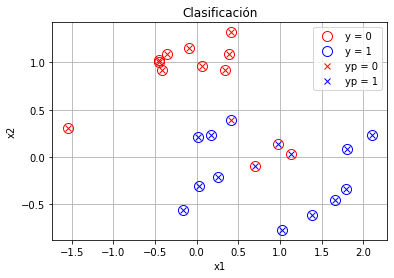


Métricas: 
               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

Matriz de confusión: 
 [[10  3]
 [ 1 11]]


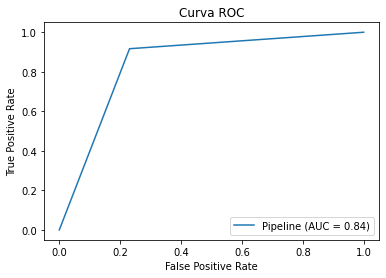

In [730]:
from sklearn.tree import DecisionTreeClassifier

model = Pipeline([('S',StandardScaler()),('C',DecisionTreeClassifier(max_depth = 1))]) 
model.fit(x_train,y_train)

print('Train Score = ', model.score(x_train, y_train)) #f1 Macro
print('Test Score = ', model.score(x_test, y_test))

Resultado(model,x_test,y_test)

Train Score =  0.9466666666666667
Test Score =  0.92


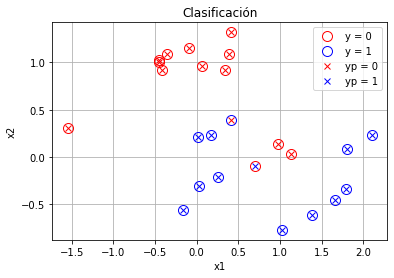


Métricas: 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

Matriz de confusión: 
 [[12  1]
 [ 1 11]]


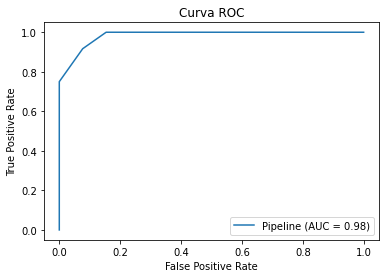

In [731]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline([('S',StandardScaler()),('C',KNeighborsClassifier(n_neighbors = 4))]) 
model.fit(x_train,y_train)

print('Train Score = ', model.score(x_train, y_train)) #f1 Macro
print('Test Score = ', model.score(x_test, y_test))

Resultado(model,x_test,y_test)

Train Score =  0.92
Test Score =  0.76


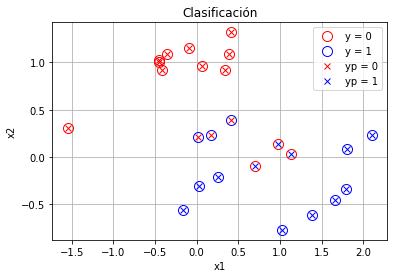


Métricas: 
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        13
         1.0       0.75      0.75      0.75        12

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25

Matriz de confusión: 
 [[10  3]
 [ 3  9]]


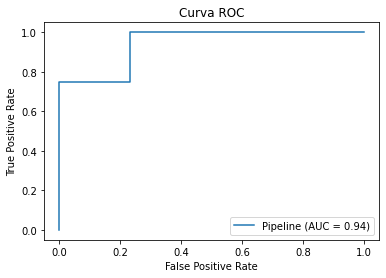

In [732]:
from sklearn.svm import SVC

model = Pipeline([('S',StandardScaler()),('C', SVC(C=0.3, kernel='rbf'))]) 
model.fit(x_train,y_train)

print('Train Score = ', model.score(x_train, y_train)) #f1 Macro
print('Test Score = ', model.score(x_test, y_test))

Resultado(model,x_test,y_test)

Train Score =  0.96
Test Score =  0.88


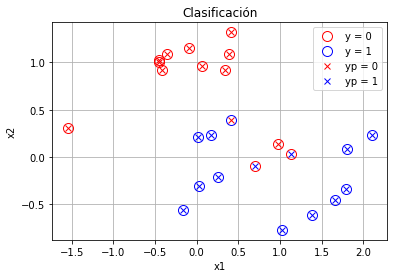


Métricas: 
               precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.85      0.92      0.88        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

Matriz de confusión: 
 [[11  2]
 [ 1 11]]


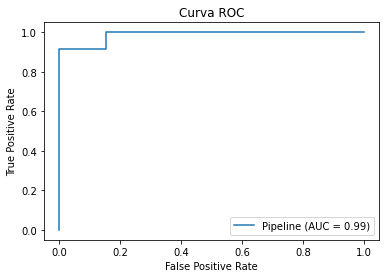

In [733]:
from sklearn.neural_network import MLPClassifier

model = Pipeline([('S',StandardScaler()),('C', MLPClassifier(hidden_layer_sizes=(150),max_iter=1500))]) 
model.fit(x_train,y_train)

print('Train Score = ', model.score(x_train, y_train)) #f1 Macro
print('Test Score = ', model.score(x_test, y_test))

Resultado(model,x_test,y_test)